Storing username and password

In [55]:
username='sample Username'
password='sample password'

# Instagram Bot 2

Importing necessary library files

In [2]:
from time import sleep
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from IPython.display import Video
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

Initiate the driver session

In [3]:
service=Service(executable_path="/path/to/chromedriver")
driver=webdriver.Chrome(service=service)
driver.get('https://www.instagram.com/')

Maximize the window

In [4]:
driver.maximize_window()

Initialize explicit wait

In [5]:
wait=WebDriverWait(driver,20)

Login to instagram

In [6]:
def Login_To_Insta(userName,Password):
    # Locating Username TextBox then enter username
    wait.until(EC.presence_of_element_located((By.NAME,'username'))).send_keys(userName)

    # Locating Password TextBox then enter password
    wait.until(EC.presence_of_element_located((By.NAME,'password'))).send_keys(Password)

    # Locating Login Button then submit it
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_acan'))).submit()

In [7]:
#Login to your Instagram Handle
Login_To_Insta(username,password)

In [8]:
sleep(5)

In [9]:
# Locating 'Save your Login Info?' then click on 'Not now' button
wait.until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class,"_acao")]'))).click()

In [10]:
# Locating 'Turn on Notification' : then click on 'No'
wait.until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class,"_a9_1")]'))).click()

# Problem 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
    
## 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [11]:
#function to return the first 10 search result of 'food' 
def search(string,n):
    User_Handle={} #this dictionary variable will store the user handle and the link to that account
    
    
    #locating the search button
    wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[2]/div[2]/div/a/div'))).click()
    
    
    # Locating Search TextBox then enter search string
    wait.until(EC.presence_of_element_located((By.XPATH,'//input[@class="_aauy focus-visible"]'))).send_keys(string)
    
    
    #find all the search result
    userID=wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_abm4')))
    
    
    #storing the base url, and on this we will append the user handle and we'll make a get request
    base_url='https://instagram.com'
    
    
    # store user handle with their handle link
    count=0
    for i in userID:
        
        if count>=n:
            break
        html_content=i.get_attribute('outerHTML')
        User_Link = BeautifulSoup(html_content,'html.parser').a['href']
        Get_User_Handle = User_Link.split('/')[1]
        if Get_User_Handle!='explore':
            User_Handle[Get_User_Handle]=base_url+User_Link
            count+=1
            
    return User_Handle

In [12]:
Store_user_IDs=search('food',10)

In [13]:
len(Store_user_IDs)

10

In [14]:
for i in Store_user_IDs:
    print(i,Store_user_IDs[i])

foodranchi https://instagram.com/foodranchi/
food_impramation https://instagram.com/food_impramation/
moglifood https://instagram.com/moglifood/
foodtalkindia https://instagram.com/foodtalkindia/
foodhunter_sabu https://instagram.com/foodhunter_sabu/
foodiyyappa https://instagram.com/foodiyyappa/
food https://instagram.com/food/
foodie_incarnate https://instagram.com/foodie_incarnate/
indori_foodiess https://instagram.com/indori_foodiess/
foodies_findings https://instagram.com/foodies_findings/


Storing the names of instagram handles

In [15]:
handle_names=[] #this will store only the username
for i in Store_user_IDs:
    handle_names.append(i)

In [16]:
for i in handle_names:
    print(i)

foodranchi
food_impramation
moglifood
foodtalkindia
foodhunter_sabu
foodiyyappa
food
foodie_incarnate
indori_foodiess
foodies_findings


Storing the link of all instagram accounts

In [17]:
user_ids=[] #this will store only the link
for i in Store_user_IDs:
    user_ids.append(Store_user_IDs[i])

In [18]:
for i in user_ids:
    print(i)

https://instagram.com/foodranchi/
https://instagram.com/food_impramation/
https://instagram.com/moglifood/
https://instagram.com/foodtalkindia/
https://instagram.com/foodhunter_sabu/
https://instagram.com/foodiyyappa/
https://instagram.com/food/
https://instagram.com/foodie_incarnate/
https://instagram.com/indori_foodiess/
https://instagram.com/foodies_findings/


Opening the first 10 handles and find the top 5 which have the highest number of followers

In [19]:
#function to return the followers of the account
def Count_Followers(user_Handle_link):
    #Go to that website
    driver.get(user_Handle_link)
    
    #wait for 2 seconds to load the data
    sleep(2)
    
    #locate the followers button
    data = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
    
    #parse that HTML data
    Follower_count = BeautifulSoup(data.get_attribute('outerHTML'),'html.parser').span['title']
    
    #replace the comma ',' with a space 
    Follower_count=int(Follower_count.replace(',',''))
    

    return Follower_count

In [20]:
# And storing the result in a dictionary
result={}
for i in range(10):
    #print(handle_names[i], end=' : ')    ->this will print the handle
    #print(Count_Followers(user_ids[i]))  ->this will print the total number of followers of that account
    
    result[handle_names[i]]=Count_Followers(user_ids[i])

In [21]:
# Printing the result
for i in result:
    print("{} : {}".format(i,result[i]))

foodranchi : 142690
food_impramation : 241680
moglifood : 2098
foodtalkindia : 309199
foodhunter_sabu : 506103
foodiyyappa : 161
food : 182643
foodie_incarnate : 1473666
indori_foodiess : 6617
foodies_findings : 511879


Sort the result in descending order and display top 5 account with highest number of followers

In [22]:
# This method is used to sort dictionary based on the values (if reverse=True, it means sorting in Descending order)
import operator
sorted_result=dict(sorted(result.items(), key=operator.itemgetter(1), reverse=True))

# printing the result
for i in sorted_result:
    print("{} : {}".format(i, sorted_result[i]))

foodie_incarnate : 1473666
foodies_findings : 511879
foodhunter_sabu : 506103
foodtalkindia : 309199
food_impramation : 241680
food : 182643
foodranchi : 142690
indori_foodiess : 6617
moglifood : 2098
foodiyyappa : 161


Storing only the top 5 handles of the sorted result

In [23]:
# These two variables will store the username and their followers
top_five_handles=[]
top_five_followers=[]

top_five_handles=sorted_result.keys()
top_five_followers=sorted_result.values()

# converting into list
top_five_handles=list(top_five_handles)
top_five_followers=list(top_five_followers)

# storing only the top 5 handles and thier followers
top_five_handles=top_five_handles[:5]
top_five_followers=top_five_followers[:5]

In [24]:
print(top_five_handles)
print(top_five_followers)

['foodie_incarnate', 'foodies_findings', 'foodhunter_sabu', 'foodtalkindia', 'food_impramation']
[1473666, 511879, 506103, 309199, 241680]


Display the result in the form of pie chart

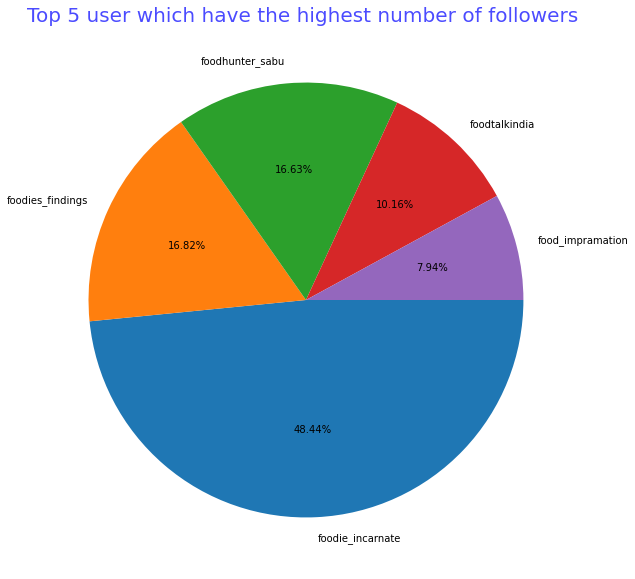

In [25]:
# Setting the size of the image
plt.figure(figsize=(10,10))

# setting the value of pie chart
plt.pie(top_five_followers,
        labels=top_five_handles,
        autopct="%.2f%%",
        counterclock=False
       )

# Title of the pie chart 
plt.title('Top 5 user which have the highest number of followers ',fontsize=20, color='blue',alpha=0.7)

# Displaying the result
plt.show()

## 1.2 Now Find the number of posts these handles have done in the previous 3 days.

Function to return the number of post from that account
1. First go to that website
2. Wait for the page to load
3. Click on the first post
4. Maintain a variable to return the answer
5. Get the time and date of that post 

In [26]:
def Number_of_Post(user_url,No_of_Days):
        
    driver.get(user_url)
    sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    while True:

        time_of_post = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="_aaqe"]'))).get_attribute('datetime')
        date_of_post = datetime.strptime(time_of_post[0:19], "%Y-%m-%dT%H:%M:%S")
        if (datetime.now() - date_of_post).days > No_of_Days :
            break
        else :
            no_of_post += 1

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        sleep(2)

    driver.back()
    return no_of_post


In [27]:
no_of_post_per_user = {}
for ID in top_five_handles:
    user_url=Store_user_IDs[ID]
    Post_count=Number_of_Post(user_url,3)
    no_of_post_per_user[ID]=Post_count

In [28]:
no_of_post_per_user

{'foodie_incarnate': 1,
 'foodies_findings': 1,
 'foodhunter_sabu': 0,
 'foodtalkindia': 4,
 'food_impramation': 0}

## 1.3 Depict this information using a suitable graph.

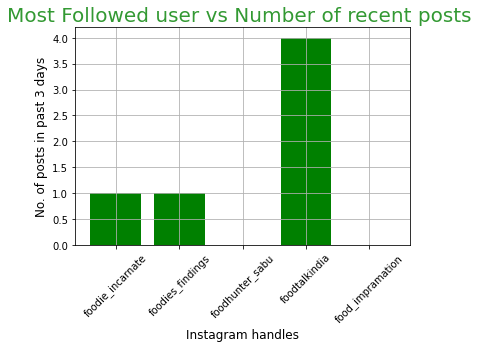

In [29]:
x = no_of_post_per_user.keys()
# Storing the names of the handle

y = no_of_post_per_user.values()
# Storing the number of post in last 3 days

# Setting the value of the bar plot
plt.bar(x,y,color='g')#ploting the name of the account and the number of posts

# Setting the x-label and y-label
plt.ylabel("No. of posts in past 3 days",size=12)
plt.xlabel("Instagram handles",size=12)

# xticks for the rotation of text in x-axis
plt.xticks(rotation = 45)

# Title of our barplot
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)

# making grids
plt.grid()

# pting the result
plt.show()

# Problem 2: Your friend also needs a list of hashtags that he should use in his posts.

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

Function to return the content of the post

In [30]:
def content_of_post(user_url,No_of_post):
        
    Text_list = []   #this variable will store the content of all words used in that post
    
    driver.get(user_url) #open the url
    
    sleep(2) #wait for the page to load
    
    #click on the first post
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    
    #variable to keep the track of number of post
    no_of_post=0
    while True:
        #get the caption of the current post
        HTML = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9zr')))
        
        #convert that text into BeautifulSoup
        Texts = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('a')
        
        # get the text
        for text in Texts:
            text=text.text
            if text[0]!='@':
                Text_list.append(text)
        
        #after every post increment this variable
        no_of_post += 1
        if No_of_post==no_of_post: #if total number of post==10 then break the loop
            break
        
        #click on the next post
        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        #wait to load the page
        sleep(2)
    
    #go to the home page
    driver.back()
    
    #return all the text of that post in the form of a list 
    return Text_list

In [31]:
# extract all the list of text of top 5 user which I get in previous qes and store them in list for further requirments

# this variable will store all the words
words_of_5_user = []


for Id in top_five_handles:
    user_url = Store_user_IDs[Id] #get the url of the account
    
    text_list = content_of_post(user_url,10) #call the function to get the list of words used in last 10 post
    
    words_of_5_user.extend(text_list) 
    #The extend() method adds the specified list elements (or any iterable) to the end of the current list.
    
    #print the result
    print(Id,'--->',text_list)
    print()
    print()

foodie_incarnate ---> ['foodie_incarnate', '#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#saibaba', '#shirdi', '#shirdisaibaba', '#viralfood', '#explore', 'foodie_incarnate', '#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#bihar', '#patna', '#viralfood', '#explore', 'foodie_incarnate', '#foodieincarnate', '#sodelhi', '#newdelhi', '#foodtalkindia', '#desifood', '#delhigram', '#indianfood', '#pancake', '#japanesecuisine', '#coffee', '#delhi', '#delhifood', '#delhifoodie', '#japanesecuisine', '#jigglypancake', '#pancakes', '#foodblogger', '#delhifoodblogger', '#mumbaifoodblogger', '#indianfoodblogger', '#selectcitywalk', '#indianfoodie', '#thingstodoindelhi', '#japanesefood', 'foodie_incarnate', '#foodieincarnate', '#reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#panipuri', '#streetfood', '#golgappa', '#viralfood', '#explore', 'foodie_incarnate', '#foodieincarnate', '#reelitfeelit', '#re

foodtalkindia ---> ['foodtalkindia', '#NewInTown', '#taproom', '#beer', '#food', '#collaboration', '#foodtalkindia', '#foodiesofindia', '#foodblogger', '#delicious', '#yummy', '#instafood', '#discover', 'foodtalkindia', '#growwithjade', '#tykexjadeforest', '#beverage', '#foodtalkindia', '#discover', 'foodtalkindia', '#paranthas', '#delhi', '#foodtalkindia', '#foodiesofindia', '#foodblogger', '#delicious', '#yummy', '#instafood', '#discover', 'foodtalkindia', '#GiveawayAlert', '#baraat', '#giveaway', '#participatenow', '#indiancuisine', '#regional', '#foodtalkindia', '#foodiesofindia', '#foodblogger', '#delicious', '#yummy', '#instafood', '#discover', 'foodtalkindia', '#NewInTown', '#bizza', '#mumbai', '#pizza', '#cocktails', '#artisanal', '#woodfired', '#oven', '#foodtalkindia', '#foodiesofindia', '#foodblogger', '#delicious', '#yummy', '#instafood', '#discover', 'foodtalkindia', '#grilledcheese', '#sandwich', '#athome', '#reelitfeelit', '#instareels', '#foodtalkindia', '#foodiesofindi

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [32]:
# function to return the frequency of all the words
def get_word_frequency(List_of_words):
    dct = {}
    words_list = []
    for word in List_of_words:
        dct[word] = dct.get(word,0) + 1
    return dct

In [33]:
# calling the function
word_freq_dict = get_word_frequency(words_of_5_user)
word_freq_dict

{'foodie_incarnate': 10,
 '#foodieincarnate': 10,
 '#reelitfeelit': 8,
 '#reelkarofeelkaro': 7,
 '#reelsinstagram': 7,
 '#reels': 7,
 '#saibaba': 1,
 '#shirdi': 1,
 '#shirdisaibaba': 1,
 '#viralfood': 7,
 '#explore': 8,
 '#bihar': 2,
 '#patna': 2,
 '#sodelhi': 1,
 '#newdelhi': 1,
 '#foodtalkindia': 11,
 '#desifood': 1,
 '#delhigram': 1,
 '#indianfood': 10,
 '#pancake': 1,
 '#japanesecuisine': 2,
 '#coffee': 2,
 '#delhi': 4,
 '#delhifood': 1,
 '#delhifoodie': 1,
 '#jigglypancake': 1,
 '#pancakes': 1,
 '#foodblogger': 14,
 '#delhifoodblogger': 1,
 '#mumbaifoodblogger': 1,
 '#indianfoodblogger': 1,
 '#selectcitywalk': 1,
 '#indianfoodie': 2,
 '#thingstodoindelhi': 1,
 '#japanesefood': 1,
 '#panipuri': 2,
 '#streetfood': 5,
 '#golgappa': 2,
 '#ghaziabad': 1,
 '#ghaziabadfood': 1,
 '#indianstreetfood': 2,
 '#puchka': 1,
 '#golgappe': 1,
 '#bihari': 1,
 '#mumbai': 5,
 '#staycation': 1,
 '#crowneplaza': 1,
 '#foodieincarnaterestaurantreviews': 1,
 '#crowneplazagreaternoida': 1,
 '#bhaang': 1,

## 2.3 Create a csv file with two columns : the word and its frequency

In [34]:
words = [ key for key,value in word_freq_dict.items()]
word_frequency = [ value for key,value in word_freq_dict.items()]

In [35]:
# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

In [36]:
# Create the pandas dataframe 
df = pd.DataFrame(columns)

In [37]:
#using .to_csv pandas function to convert dataframe to csv without Index values
df.to_csv('words_frequency.csv',index=False)

In [38]:
# Printing the Top 10 Row of the table
df

,Word,Frequency
0,foodie_incarnate,10
1,#foodieincarnate,10
2,#reelitfeelit,8
3,#reelkarofeelkaro,7
4,#reelsinstagram,7
...,...,...
315,#kefir,1
316,#plantbased,1
317,#health,1
318,#glutenfree,1


## 2.4 Now, find the hashtags that were most popular among these bloggers

In [39]:
# Functio to sort the dictionary's keys according to the value 
def sort_by_value(Dict):
    sorted_data = [[value,key] for key,value in Dict.items()]
    
    # sort in the decreasing order
    sorted_data.sort(reverse=True)
    
    # return the sorted list
    return sorted_data

In [40]:
# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = sort_by_value(word_freq_dict)

In [41]:
# top hashtags
for i in hastag_with_frequency:
    print(i[1],'-->',i[0],'Hashtags')

#instafood --> 25 Hashtags
#foodgasm --> 18 Hashtags
#foodstagram --> 17 Hashtags
#foodporn --> 17 Hashtags
#foodblogger --> 14 Hashtags
#yummy --> 13 Hashtags
#delicious --> 13 Hashtags
#foodtalkindia --> 11 Hashtags
#chennaifoodie --> 11 Hashtags
#chennaifood --> 11 Hashtags
foodtalkindia --> 10 Hashtags
foodies_findings --> 10 Hashtags
foodie_incarnate --> 10 Hashtags
food_impramation --> 10 Hashtags
#wherechennaieats --> 10 Hashtags
#walkwithchennai --> 10 Hashtags
#reelsininstagram --> 10 Hashtags
#instagram --> 10 Hashtags
#instagood --> 10 Hashtags
#indianfood --> 10 Hashtags
#friedrice --> 10 Hashtags
#foodvideography --> 10 Hashtags
#foodofchennai --> 10 Hashtags
#foodiesfindings --> 10 Hashtags
#foodieincarnate --> 10 Hashtags
#foodaddict --> 10 Hashtags
#food --> 10 Hashtags
#eatrepeat --> 10 Hashtags
#discover --> 10 Hashtags
#chennai😍 --> 10 Hashtags
#chennaites --> 10 Hashtags
#chennaifoodspots --> 10 Hashtags
#chennaifoodies --> 10 Hashtags
#chennaifoodguide --> 10 Hasht

## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [42]:
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

# This will store the hashtag name
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]] 


# This will store the frequency of that hasntag 
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

Pie graph to get the idea of which hashtag has been used for most of the time.

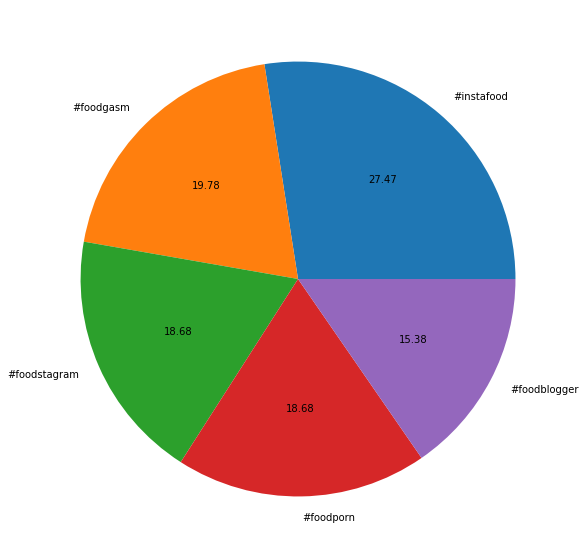

In [43]:
# Set the size of the pie chart
plt.figure(figsize=(10,10))

# set the values of the pie chart upto 2 decimal place
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")

# show the chart
plt.show()

# Problem 3: You need to also calculate average followers : likes ratio for the obtained handles.
# Followers : Likes ratio is calculated as follows:

## 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [44]:
def Likes_of_post(user_url,No_of_post):
        
    Totel_Likes = 0
    driver.get(user_url)
    sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.XPATH,'//section[@class="_ae5m _ae5n _ae5o"]')))
        
        Likes = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('span')[-1]
        #print(Likes)
        
        
        Likes = int(Likes.text.replace(',',''))
        
        
        Totel_Likes+=Likes
        no_of_post += 1
        if No_of_post==no_of_post:
            break

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        sleep(2)

    driver.back()
    return Totel_Likes

In [45]:
# iterate over top 5 user handle and put profile link in function
print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")


Total_likes_of_user = {}
for Id in top_five_handles:
    user_url = Store_user_IDs[Id]
    Total_Likes = Likes_of_post(user_url,8)
    Total_likes_of_user[Id]=Total_Likes
    print(Id,'--->',Total_Likes)
    print()


---------------------------------
Total Likes for 10 Posts
---------------------------------
foodie_incarnate ---> 260981

foodies_findings ---> 238155

foodhunter_sabu ---> 244364

foodtalkindia ---> 2266

food_impramation ---> 195165



## 3.2 Calculate the average likes for a handle.

Function to calculate the average like for an account

In [46]:
def get_avg_likes(Total_Likes,Number_of_Post):
    avg_likes = Total_Likes / Number_of_Post
    return avg_likes

In [47]:
# calculating avarge likes for 5 handles for 10 posts and store the result in list
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
average_likes_dict={}
for Id,Total_Likes in Total_likes_of_user.items():
    avg_likes = get_avg_likes(Total_Likes,8)
    average_likes_dict[Id]=avg_likes
    print(Id,'---->',format(avg_likes,'.0f'))

---------------------------------
Average Likes
---------------------------------
foodie_incarnate ----> 32623
foodies_findings ----> 29769
foodhunter_sabu ----> 30546
foodtalkindia ----> 283
food_impramation ----> 24396


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [48]:
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = {}
for ID in top_five_handles:
    for i in range(5):
        avg_followers_count = int(top_five_followers[i]/average_likes_dict[ID])
        avg_followers[ID]=avg_followers_count
    print(ID,'---->',avg_followers_count,':',int(average_likes_dict[ID]))

---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
foodie_incarnate ----> 7 : 32622
foodies_findings ----> 8 : 29769
foodhunter_sabu ----> 7 : 30545
foodtalkindia ----> 853 : 283
food_impramation ----> 9 : 24395


## 3.4 Create a bar graph to depict the above obtained information.

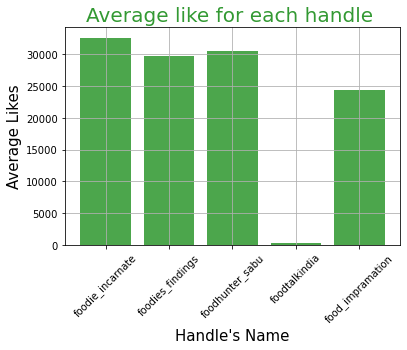

In [49]:
#for this I will use answer of problem 3.2 
username = list(average_likes_dict.keys())
avg_like = list(average_likes_dict.values())

plt.bar(username,avg_like,color='g',alpha=0.7)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 45)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

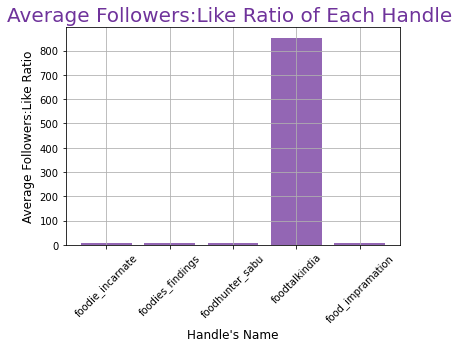

In [50]:
# Plotting Bar Graph for average followers:like ratio of each handle

#For this I will use answer of problem 3.3
username = list(avg_followers.keys())
avg_like = list(avg_followers.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.xticks(rotation = 45)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()


# Logout from Instagram

In [51]:
def logout():
    #locate and click to the setting button 
    wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@CLASS,"xl5mz7h xhuyl8g")]'))).click()
    sleep(1)
    #locate the 'Log Out' button
    wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div/div/div/div[1]/div/div/div/div[1]/div[1]/div[1]/div/div/div/div/div[3]/div/div/div[1]/div/div[1]/div[6]/div/div/div/div/div/div'))).click()

In [52]:
logout()

Close the driver

In [53]:
driver.close()